## BCG PowerCo EDA And Feature Engineering

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
client_data = pd.read_csv(r"C:\Users\Maaz\OneDrive\Desktop\Power Co\client_data (1).csv")
client_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [4]:
price_data = pd.read_csv(r"C:\Users\Maaz\OneDrive\Desktop\Power Co\price_data (1).csv")
price_data.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Descriptive statistics of data

### Data types

The data types may dictate how you transform and engineer features.

In [6]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
client_data.shape

(14606, 26)

In [9]:
client_data.isna().sum().sum()

0

In [10]:
price_data.shape

(193002, 8)

In [11]:
price_data.isna().sum().sum()

0

In [12]:
client_data.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

### Statistics

Now let's look at some statistics about the datase.ts

In [14]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [15]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [16]:
price_mean= price_data.iloc[:,2:].mean()
price_mean

price_off_peak_var     0.141027
price_peak_var         0.054630
price_mid_peak_var     0.030496
price_off_peak_fix    43.334477
price_peak_fix        10.622875
price_mid_peak_fix     6.409984
dtype: float64

In [17]:
average_mean_prices= (price_mean.sum()/6)
average_mean_prices

10.098914989314245

### Data visualization
If you're working in Python, two of the most popular packages for visualization are matplotlib and seaborn. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!.

## Churn

In [20]:

def plot_stacked_bar(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(
        kind='bar',
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_,
        legend=legend_
    )
    annonate_stacked_bar(ax,textsize=14)
    plt.legend(["retention","churn"],loc=legend_)
    plt.ylabel=("company base(%)") # % of the companies customer base that false into two categories(churn and retention)
    plt.show()
def annonate_stacked_bar(ax, pad = 0.99, colour= "white", textsize= 13):
    for i in ax.patches:
        value= str(round(i.get_height(),1))
        if value == "0.0":
           continue
        ax.annotate(
           value,
           ((i.get_x()+ i.get_width()/2)*pad-0.05, (i.get_y()+i.get_height()/2)*pad),
            color=colour,
            size=textsize
            )
         
    

In [21]:
churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

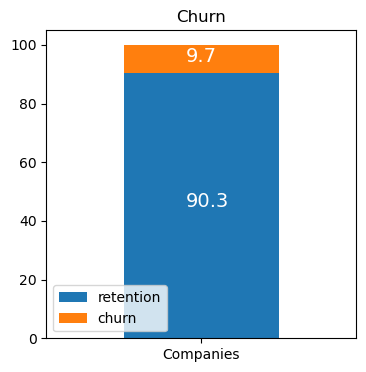

In [22]:
plot_stacked_bar(churn_percentage.transpose(), "Churn", (4, 4), legend_="lower left")

### About 10% of the total customers have churned. 

## Consumption

In [25]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [26]:
def plot_distribution(dataframe, column, ax, bins_=50):
    
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
   
    ax.set_xlabel(column)
    # Change the x-axis to a plain style
    ax.ticklabel_format(style='plain', axis='x')

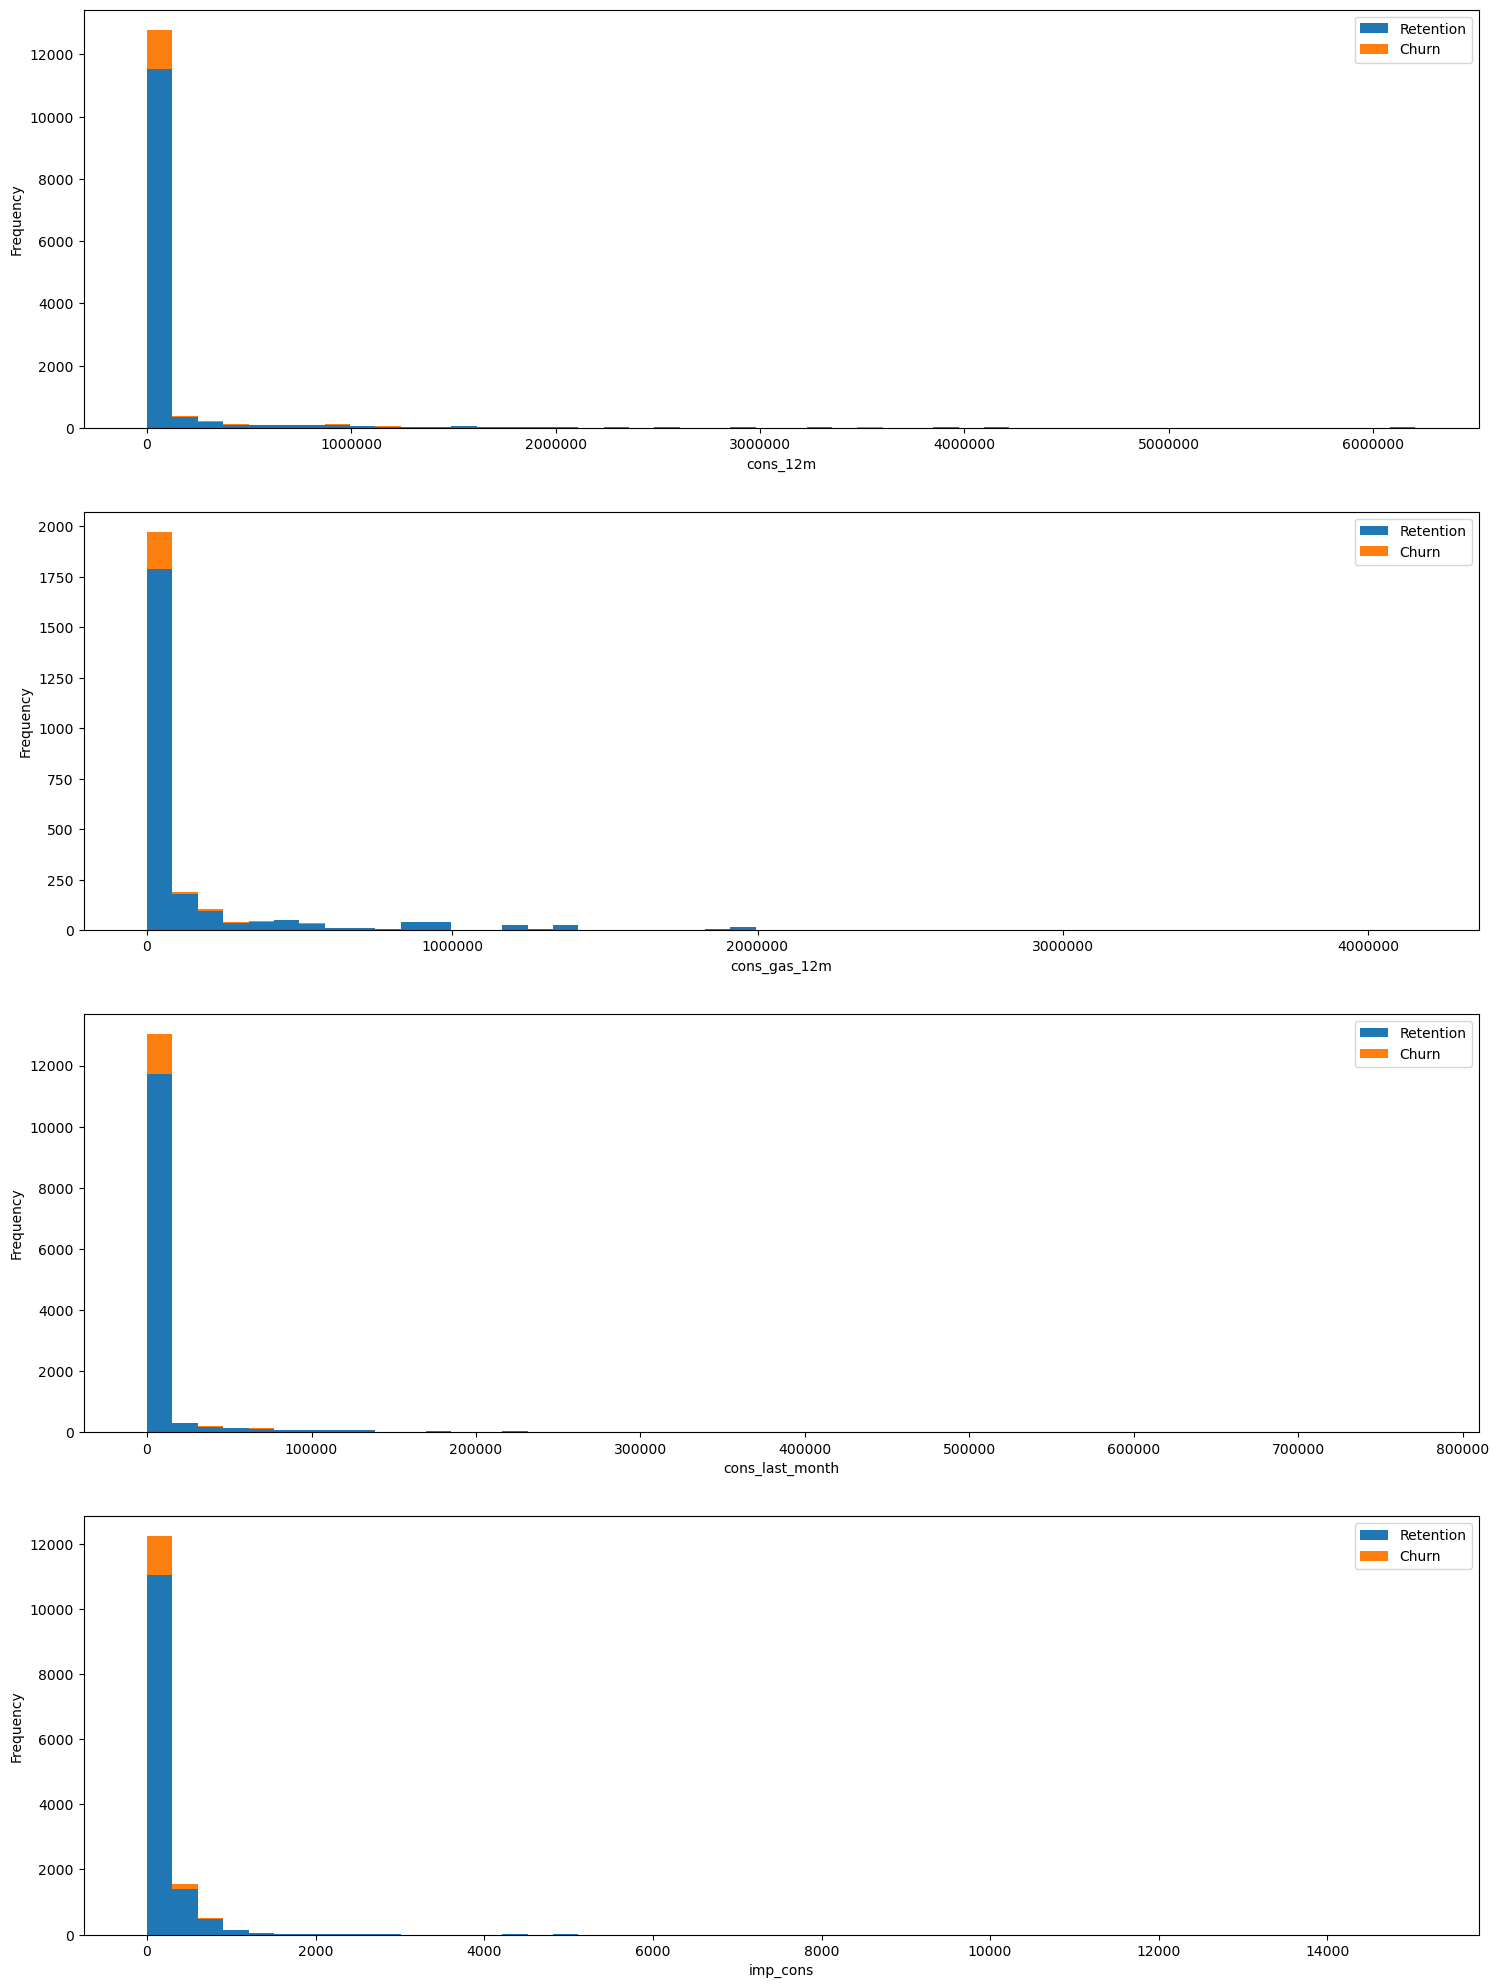

In [27]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

In [28]:
forecast = client_data[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

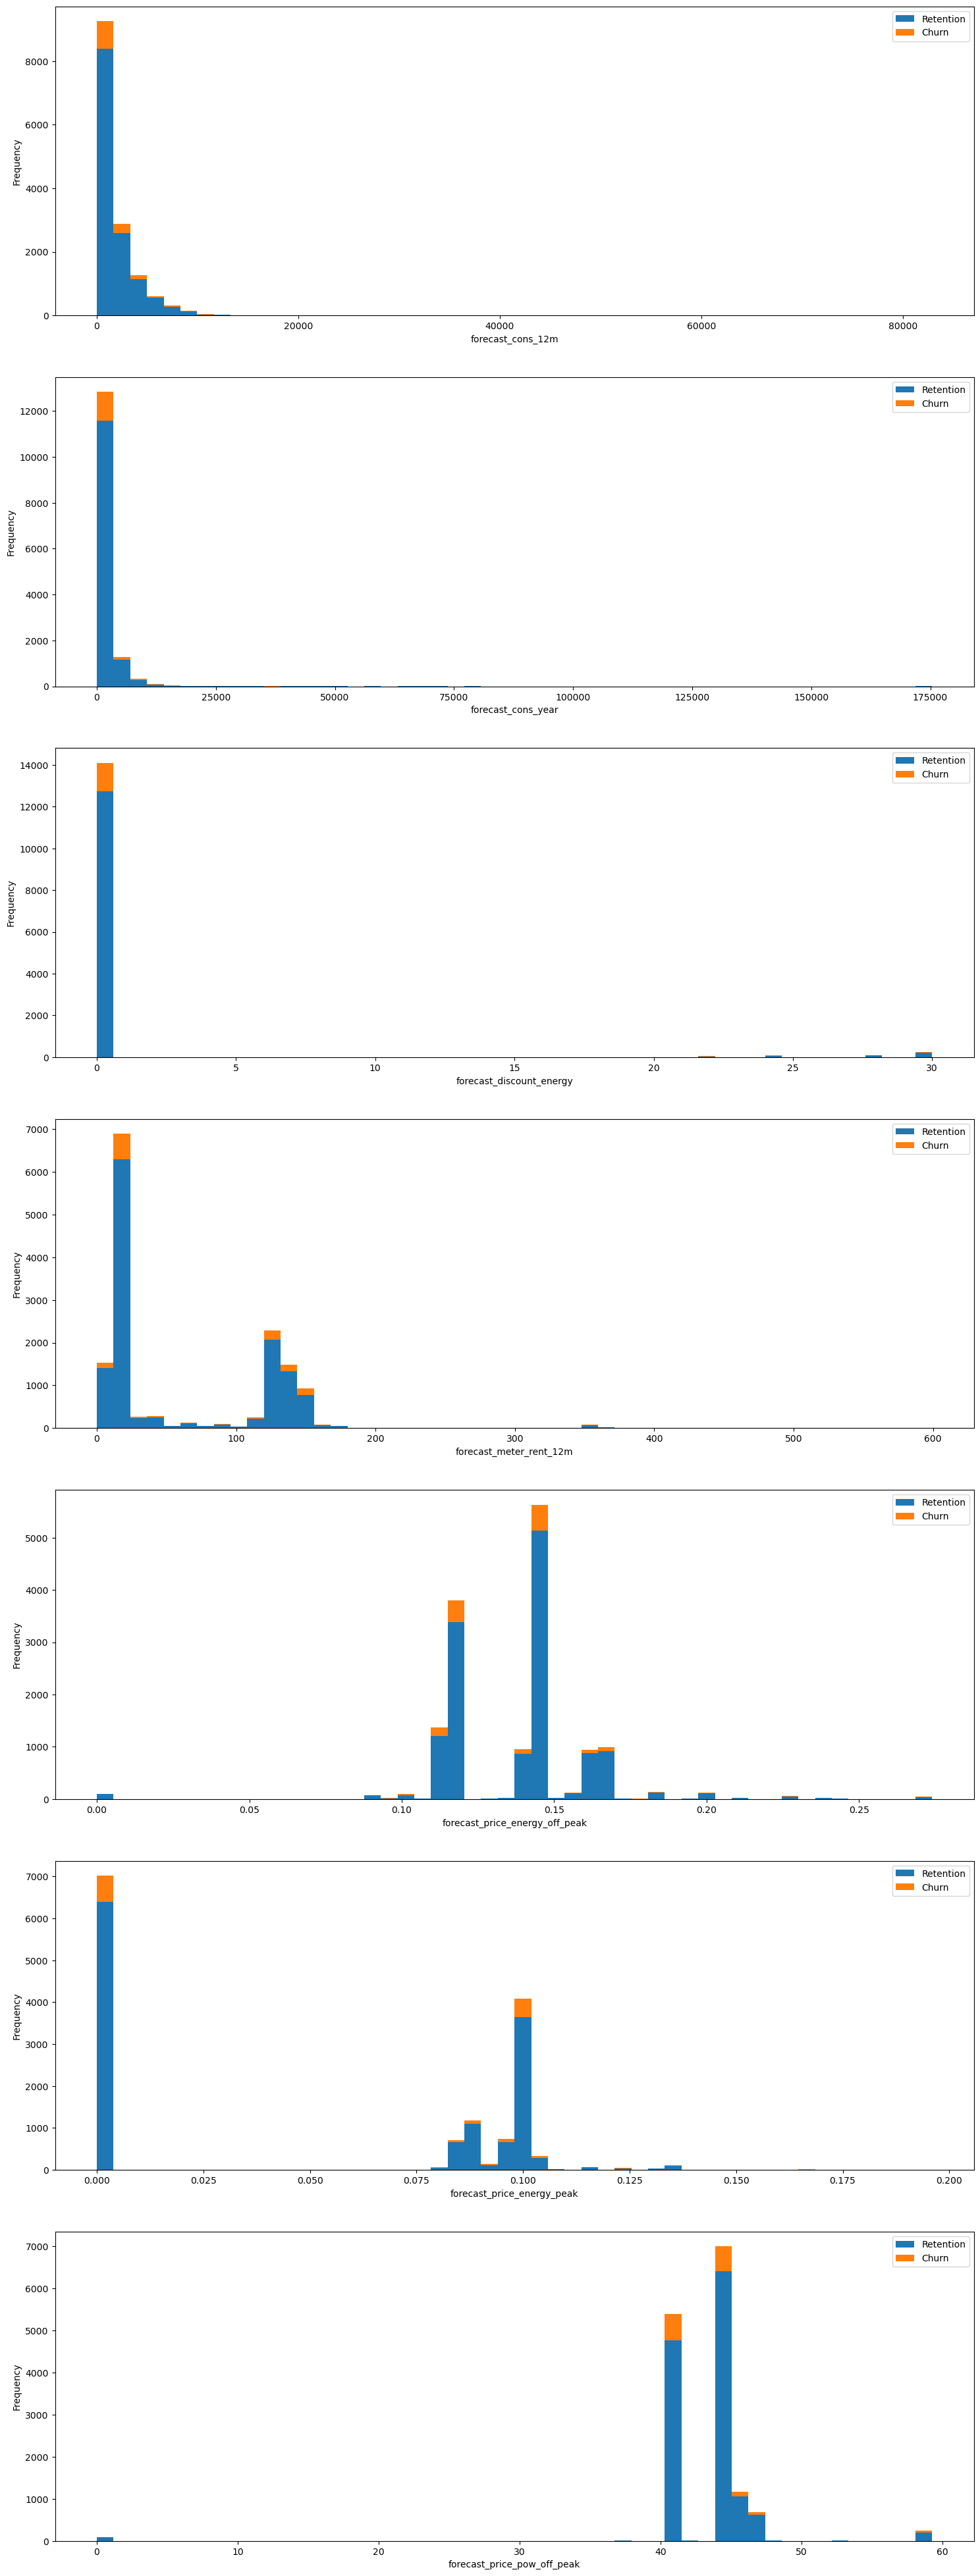

In [29]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])

### power

In [31]:
power= client_data[
    ["id","margin_gross_pow_ele","margin_net_pow_ele",
     "net_margin","pow_max","churn"
    ]
]

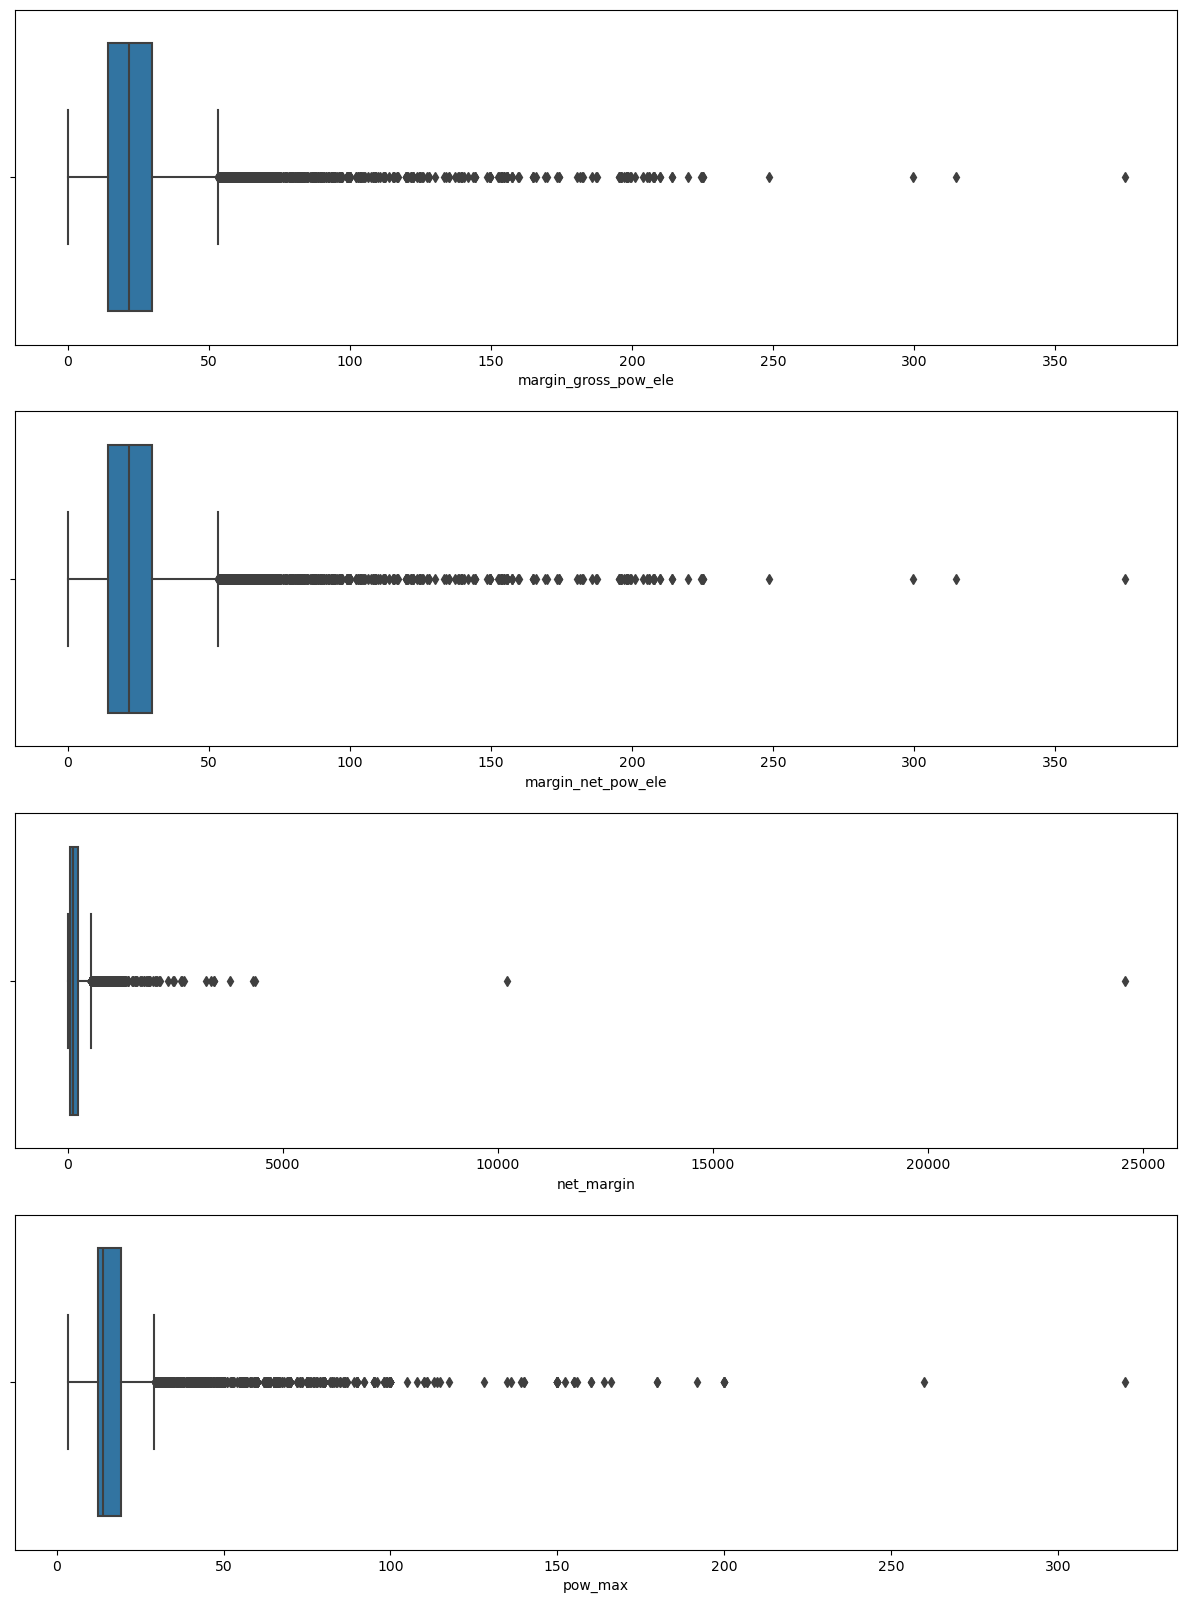

In [32]:
fig, axs = plt.subplots(nrows=4, figsize=(15,20))

# Plot histogram
sns.boxplot(x=client_data["margin_gross_pow_ele"],ax=axs[0])
sns.boxplot(x=client_data["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(x=client_data["net_margin"],ax=axs[2])
sns.boxplot(x=client_data["pow_max"],ax=axs[3])

plt.show()


In [33]:
other= client_data[
    ["id", "nb_prod_act", "num_years_antig", "churn"
    ]
]

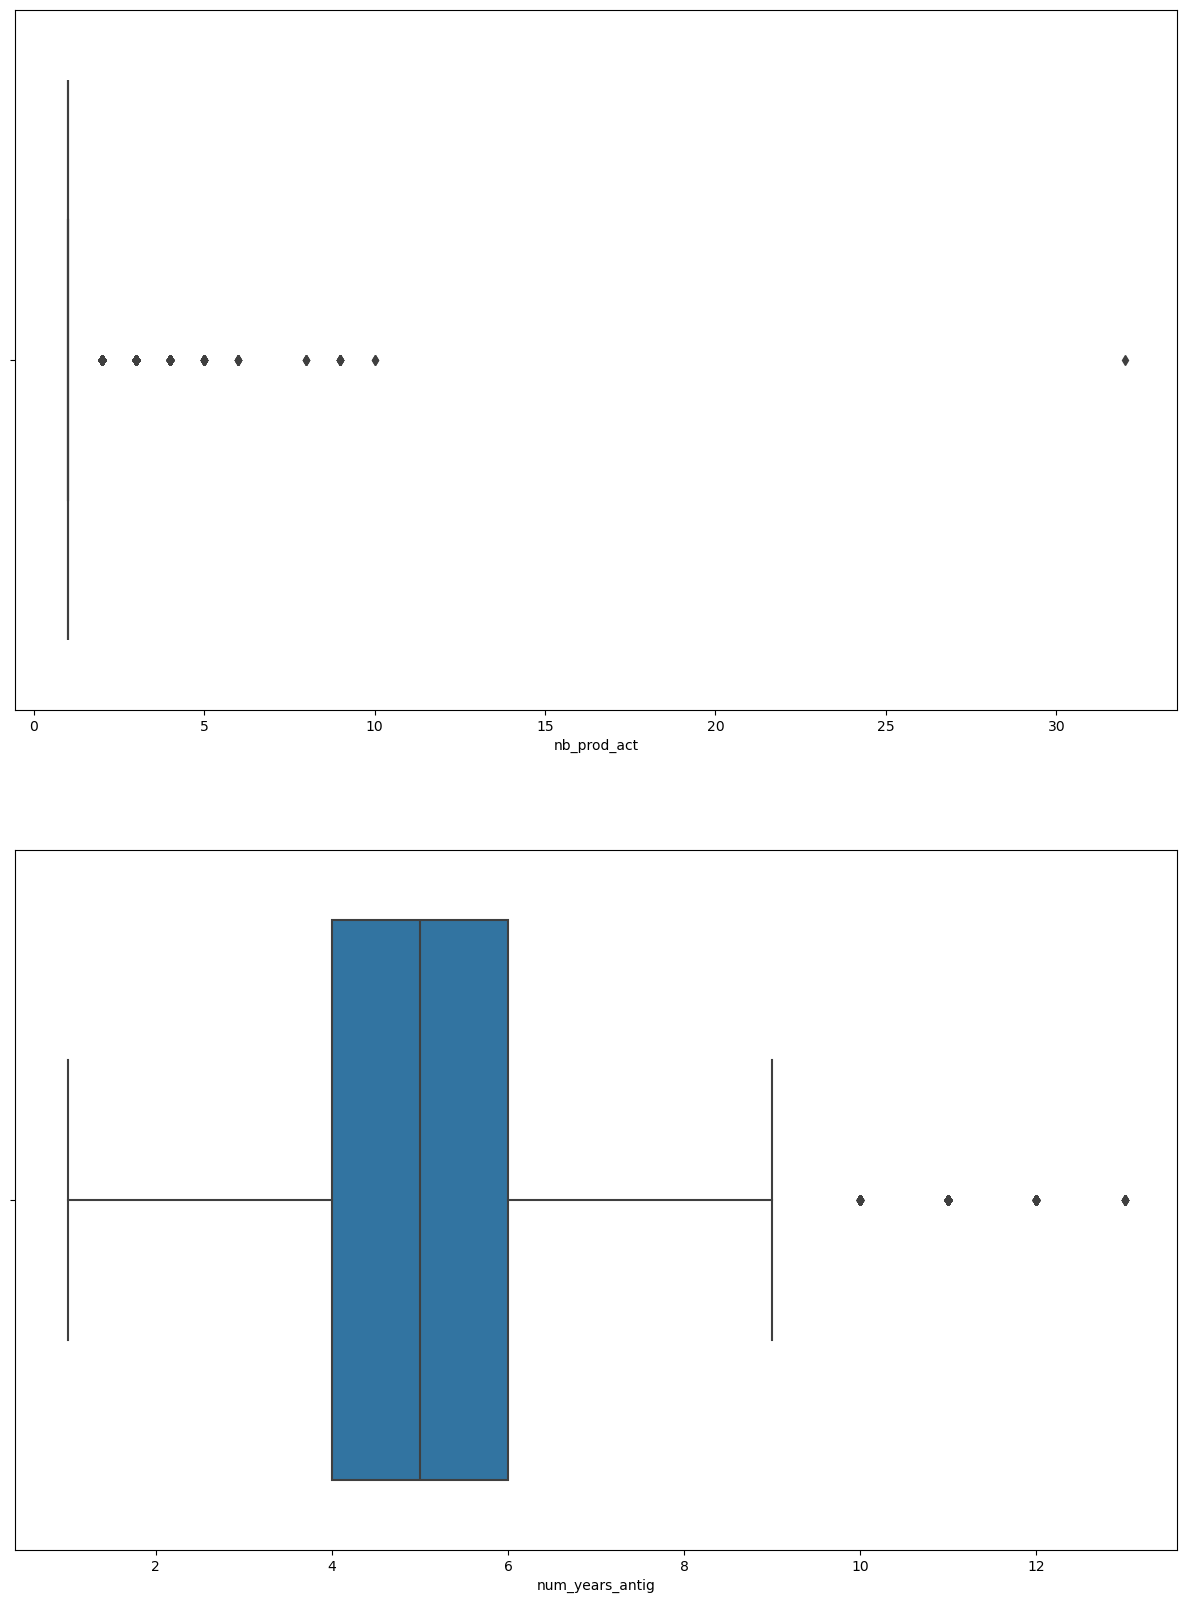

In [34]:
fig, axs = plt.subplots(nrows=2, figsize=(15,20))

# Plot histogram
sns.boxplot(x=client_data["nb_prod_act"],ax=axs[0])
sns.boxplot(x=client_data["num_years_antig"],ax=axs[1])

plt.show()

### Feature Engineering 
Feature engineering extracts useful features from raw data using maths, stats and domain knowledge. outlier detection, one hot encoding and handling missing values are a few examples of feature engineering.


In [36]:
clean_df= client_data.merge(price_data, on= "id") # By default it will do inner join and take only those values which are similar in both df
clean_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


In [37]:
clean_df.isna().sum().sum()

0

In [38]:
clean_df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [39]:
clean_df["date_activ"] = pd.to_datetime(clean_df["date_activ"], format='%Y-%m-%d')
clean_df["date_end"] = pd.to_datetime(clean_df["date_end"], format='%Y-%m-%d')
clean_df["date_modif_prod"] = pd.to_datetime(clean_df["date_modif_prod"], format='%Y-%m-%d')
clean_df["date_renewal"] = pd.to_datetime(clean_df["date_renewal"], format='%Y-%m-%d')
clean_df["price_date"] = pd.to_datetime(clean_df["price_date"], format='%Y-%m-%d')

In [40]:
clean_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [41]:
clean_df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

###  Difference between off-peak prices in December and January the preceding year.
By calculating the differences in both energy and power costs between December and January, you're capturing different aspects of pricing changes:

Energy Differences: reflect changes in consumption patterns or adjustments in energy tariffs.
Power Differences: indicate changes in peak demand or adjustments in the fixed costs associated with maintaining the ability to meet that demand.

In [43]:
#Grouping Off-Peak Prices by Company and Month:
monthly_price =clean_df.groupby(["id","price_date"]).agg({"price_off_peak_var":"mean","price_off_peak_fix":"mean"}).reset_index()
# Extracting January and December Prices:

jan_price= monthly_price.groupby("id").first().reset_index()
dec_price= monthly_price.groupby("id").last().reset_index()

#Difference between off-peak prices in December and January the preceding year.
# merge the December and January prices using ID as the key.

diff=pd.merge(dec_price.rename(columns={"price_off_peak_var":"dec_1","price_off_peak_fix":"dec_2"}),jan_price.drop(columns="price_date"),on="id")
# Calculate the difference in the variable and fixed off-peak prices between December and January.

diff["off_peak_dec_january_energy"]=diff['dec_1']-diff["price_off_peak_var"] #Energy (Variable Cost):
diff["off_peak_dec_january_power"]=diff['dec_1']-diff["price_off_peak_fix"] #Power (Fixed Cost):
diff=diff[["id","off_peak_dec_january_energy","off_peak_dec_january_power"]]
diff

,id,off_peak_dec_january_energy,off_peak_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,-40.446063
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,-44.122988
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,-44.243430
3,00114d74e963e47177db89bc70108537,-0.003994,-44.121491
4,0013f326a839a2f6ad87a1859952d227,-0.006171,-40.607238
...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,-0.010493,-40.450053
14602,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,-44.121884
14603,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,-40.912571
14604,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,-40.447794


In [44]:
df= pd.merge(clean_df,diff, on= "id")
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,off_peak_dec_january_energy,off_peak_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,-40.419936
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,-40.419936
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,-40.419936
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,-40.419936
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,-40.419936


## Average price changes across period
We can now enhance the feature that our colleague made by calculating the average price changes across individual periods, instead of the entire year
feature scaling mean, mix ,min.

In [46]:
mean_prices = clean_df.groupby(["id"]).agg({
    "price_off_peak_var":"mean",
    "price_peak_var":"mean",
    "price_mid_peak_var":"mean",
    "price_off_peak_fix":"mean",	
    "price_peak_fix":"mean",
    "price_mid_peak_fix":"mean",
}).reset_index()


In [47]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [48]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(clean_df, mean_prices[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565969,24.339581,16.226389,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565969,24.339581,16.226389,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565973,24.339578,16.226383,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565973,24.339578,16.226383,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565973,24.339578,16.226383,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925


## Max price changes across periods and months

Another way we can enhance the feature from our colleague is to look at the maximum change in prices across periods and months.

In [50]:
# Group by id and price_date, then calculate mean prices
monthly_max_prices = clean_df.groupby(["id", "price_date"]).agg({
    "price_off_peak_var": "mean",
    "price_peak_var": "mean",
    "price_mid_peak_var": "mean",
    "price_off_peak_fix": "mean",    
    "price_peak_fix": "mean",
    "price_mid_peak_fix": "mean"
}).reset_index()

In [51]:
# Calculate differences
monthly_max_prices['off_peak_peak_var_mean_diff'] = monthly_max_prices['price_off_peak_var'] - monthly_max_prices['price_peak_var']
monthly_max_prices['peak_mid_peak_var_mean_diff'] = monthly_max_prices['price_peak_var'] - monthly_max_prices['price_mid_peak_var']
monthly_max_prices['off_peak_mid_peak_var_mean_diff'] = monthly_max_prices['price_off_peak_var'] - monthly_max_prices['price_mid_peak_var']
monthly_max_prices['off_peak_peak_fix_mean_diff'] = monthly_max_prices['price_off_peak_fix'] - monthly_max_prices['price_peak_fix']
monthly_max_prices['peak_mid_peak_fix_mean_diff'] = monthly_max_prices['price_peak_fix'] - monthly_max_prices['price_mid_peak_fix']
monthly_max_prices['off_peak_mid_peak_fix_mean_diff'] = monthly_max_prices['price_off_peak_fix'] - monthly_max_prices['price_mid_peak_fix']


In [52]:
diff_monthly_max_prices= monthly_max_prices.groupby(["id"]).agg({
    'off_peak_peak_var_mean_diff':"max",
    'peak_mid_peak_var_mean_diff':"max",
    'off_peak_mid_peak_var_mean_diff':"max",
    'off_peak_peak_fix_mean_diff':"max",	
    "peak_mid_peak_fix_mean_diff":"max",
    'off_peak_mid_peak_fix_mean_diff':"max",
}).reset_index()

diff_monthly_max_prices = diff_monthly_max_prices.rename(columns={
    "off_peak_peak_var_mean_diff": "off_peak_peak_var_diff_monthly_max_diff",
    "peak_mid_peak_var_mean_diff": "peak_mid_peak_var_diff_monthly_max_diff",
    "off_peak_mid_peak_var_mean_diff": "off_peak_mid_peak_var_monthly_max_diff",
    "off_peak_peak_fix_mean_diff": "off_peak_peak_fix_monthly_max_diff",
    "peak_mid_peak_fix_mean_diff": "peak_mid_peak_fix_monthly_max_diff",
    "off_peak_mid_peak_fix_mean_diff": "off_peak_mid_peak_fix_monthly_max_diff"
})

In [53]:
columns = [
    'id',
    'off_peak_peak_var_diff_monthly_max_diff',
    "peak_mid_peak_var_diff_monthly_max_diff",
    'off_peak_mid_peak_var_monthly_max_diff',
    'off_peak_peak_fix_monthly_max_diff', 
    'peak_mid_peak_fix_monthly_max_diff', 
    'off_peak_mid_peak_fix_monthly_max_diff'
]

# Merge with the original DataFrame
df = pd.merge(clean_df, diff_monthly_max_prices[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,off_peak_peak_var_diff_monthly_max_diff,peak_mid_peak_var_diff_monthly_max_diff,off_peak_mid_peak_var_monthly_max_diff,off_peak_peak_fix_monthly_max_diff,peak_mid_peak_fix_monthly_max_diff,off_peak_mid_peak_fix_monthly_max_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565969,24.339581,16.226389,0.06055,0.085483,0.146033,44.26693,8.145775,44.26693
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565969,24.339581,16.226389,0.06055,0.085483,0.146033,44.26693,8.145775,44.26693
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565973,24.339578,16.226383,0.06055,0.085483,0.146033,44.26693,8.145775,44.26693
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565973,24.339578,16.226383,0.06055,0.085483,0.146033,44.26693,8.145775,44.26693
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,0.071536,40.565973,24.339578,16.226383,0.06055,0.085483,0.146033,44.26693,8.145775,44.26693


In [54]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,peak_mid_peak_var_diff_monthly_max_diff,off_peak_mid_peak_var_monthly_max_diff,off_peak_peak_fix_monthly_max_diff,peak_mid_peak_fix_monthly_max_diff,off_peak_mid_peak_fix_monthly_max_diff,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0.085483,0.146033,44.26693,8.145775,44.26693,False,False,True,False,False
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0.085483,0.146033,44.26693,8.145775,44.26693,False,False,True,False,False
2,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0.085483,0.146033,44.26693,8.145775,44.26693,False,False,True,False,False
3,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0.085483,0.146033,44.26693,8.145775,44.26693,False,False,True,False,False
4,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0.085483,0.146033,44.26693,8.145775,44.26693,False,False,True,False,False


In [55]:
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal',
    'price_date' 
]

df = df.drop(columns=remove)

### Data Science - Statistics Correlation


In [57]:
numeric_columns =df.select_dtypes(include=['float64', 'int64']).columns
correlation= df[numeric_columns].corr()


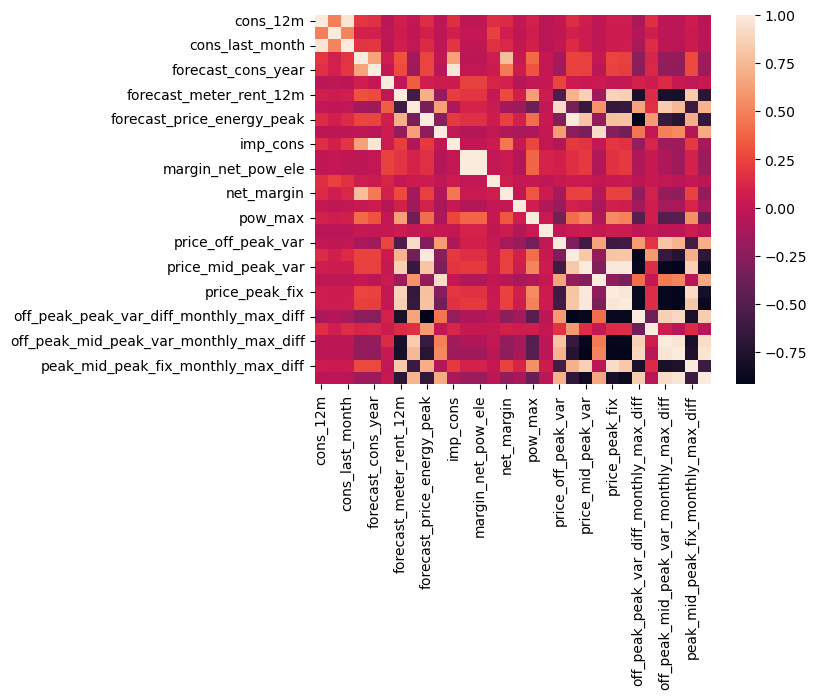

In [58]:
sns.heatmap(correlation)
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
train_df=df.copy()

In [94]:
y = df['churn']
X = df.drop(columns=['id', 'churn'])

In [120]:
# Convert 'has_gas' to numeric values (e.g., 0 for No/False and 1 for Yes/True)
X['has_gas'] = X['has_gas'].map({'Yes': 1, 'No': 0})
X = X.dropna()
y = y.loc[X.index]
assert len(X) == len(y)

In [122]:
X.dtypes

cons_12m                                        int64
cons_gas_12m                                    int64
cons_last_month                                 int64
forecast_cons_12m                             float64
forecast_cons_year                              int64
forecast_discount_energy                      float64
forecast_meter_rent_12m                       float64
forecast_price_energy_off_peak                float64
forecast_price_energy_peak                    float64
forecast_price_pow_off_peak                   float64
has_gas                                         int64
imp_cons                                      float64
margin_gross_pow_ele                          float64
margin_net_pow_ele                            float64
nb_prod_act                                     int64
net_margin                                    float64
num_years_antig                                 int64
pow_max                                       float64
price_off_peak_var          

In [124]:
# Assume X is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Feature importance
importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, importance):
    print(f"{feature}: {importance:.4f}")

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.